# Непараметрические гипотезы. Домашнее задание


Пришло время применить знания, полученные на уроке по непараметрическим гипотезам. Попрактикуйтесь в решении задач.


Скачать [файлы домашнего задания](https://drive.google.com/drive/folders/1oseSHWOk6i_ZmejGR2hsVFWeVM_3XLkT?usp=sharing)



# Задача 1

1. Импортируйте файл "Данные для дз5 Корреляции.csv"
2. Постройте гистограммы распределения для рядов PHYSICS и BLOOD и сделайте визуальный вывод о нормальности распределения данных
3. Постройте scatterplot этих двух величин и сделайте визуальный вывод о корреляции между ними
4. Создайте функцию **proxi_ranges**, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию - 5%)
5. Данная функция делает следующие действия:
    - Вычисляет дисперсии рядов и их ковариацию с помощью функции cov из numpy и принтит эти результаты в user-friendly манере
    - Вычисляет корреляцию Пирсона и корреляцию Спирмена и p_value этих корреляций
    - Принтит результаты корреляционного анализа: корреляция равна нулю, если p_value больше альфы. В противном случае, принтит, является ли корреляция слабой (меньше 0.3), средней (от 0.3 до 0.7) или сильной (больше 0.7) (для обеих корреляций)
    - Функция не обладает return
6. Примените эту функцию к рядам PHYSICS и BLOOD из csv-файла

# Задача 2

1. Импортируйте файл "Данные для дз5 Манн-Уитни.csv"
2. Постройте гистограмму рядов BLOOD1 и BLOOD2
3. Создайте функцию **mann_whitney_func**, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию - 5%)
4. Данная функция делает следующие действия:
    - в return - значение статистики Манна-Уитни и p_value нулевой гипотезы
    - Принт результата в зависимости от соотношения p_value и alpha ("Распределения (не) равны")
5. Примените эту функцию к рядам BLOOD1 и BLOOD2 из csv-файла
6. Примените к этим рядам также t-test для сравнения средних

### **Условия сдачи домашней работы:**

Оформите решение в файле .***ipynb***. Опишите ваши выводы и подсветите цифры, на основании которых вы формируете выводы.

### **Что делать, если не получается сделать домашку:**

1. Посмотреть в **Шпаргалку**, там есть много подсказок, которые помогут в решении
2. Написать сообщение в **Mattermost** или спросить наставника на платформе через вкладку **Домашняя работа**

---
---

# Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt

# Задача 1. Решение



***1. Импортируйте файл "Данные для дз5 Корреляции.csv"***


In [2]:
file_name = 'Данные для дз5 Корреляции.csv'
df = pd.read_csv(file_name, sep=';')
df.sample(10)

,PHYSICS,BLOOD
1144,90,134
931,26,139
1433,133,72
611,4,90
110,41,100
1156,44,100
1173,132,75
141,164,100
978,87,109
775,171,78


***2. Постройте гистограммы распределения для рядов PHYSICS и BLOOD и сделайте визуальный вывод о нормальности распределения данных***


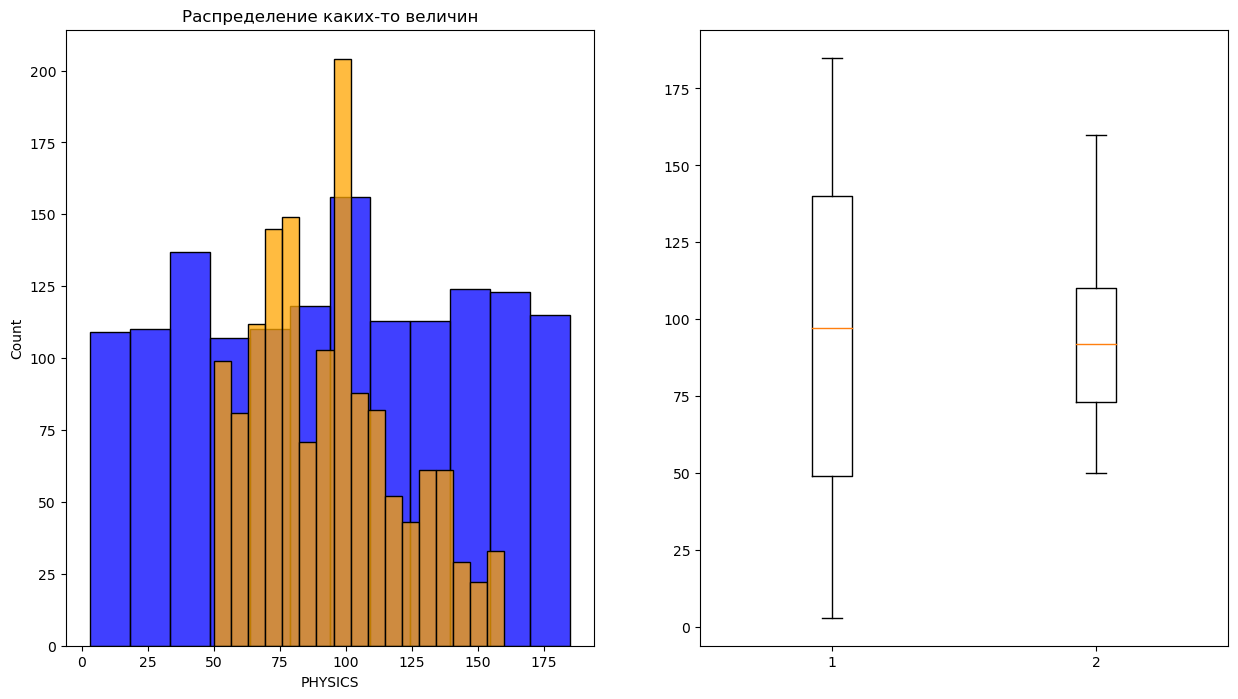

In [3]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

sns.histplot(ax=ax1, data=df, x='PHYSICS', color='blue')
sns.histplot(ax=ax1, data=df, x='BLOOD', color='orange')
ax1.set_title('Распределение каких-то величин')

ax2.boxplot(x=df[['PHYSICS', 'BLOOD']])
plt.show()

Визуально мы видим что колонка таблицы 'BLOOD' похожа на нармальное распределение, а колонка 'PHYSICS' визуально недостаточно что бы подтвердить бнормальную распределенность, однако максимумы у двух параметров в одном месте.

***3. Постройте scatterplot этих двух величин и сделайте визуальный вывод о корреляции между ними***


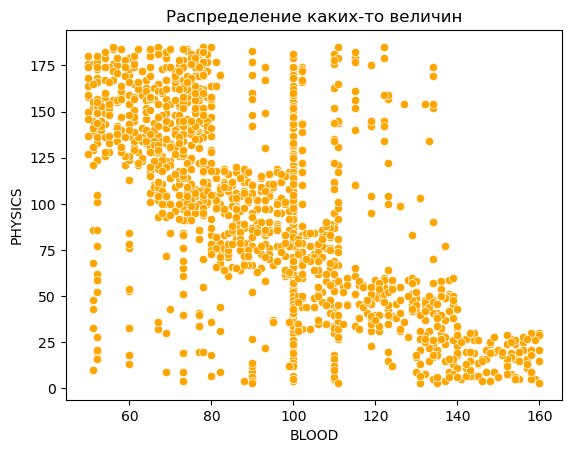

In [4]:

sns.scatterplot(data=df, x='BLOOD', y='PHYSICS', color='orange')
plt.title('Распределение каких-то величин')

plt.show()

По графике четко видно где преимущественно распределены точки, четко отслеживается зависимость, но непонятна природа точек собранных в вертикальные линии с шагом примерно 10 единиц по оси 'BLOOD'

***4. Создайте функцию `proxi_ranges`, которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию - 5%)***


***5. Данная функция делает следующие действия:***

    - Вычисляет дисперсии рядов и их ковариацию с помощью функции cov из numpy и принтит эти результаты в user-friendly манере
    - Вычисляет корреляцию Пирсона и корреляцию Спирмена и p_value этих корреляций
    - Принтит результаты корреляционного анализа: корреляция равна нулю, если p_value больше альфы. В противном случае, принтит, является ли корреляция слабой (меньше 0.3), средней (от 0.3 до 0.7) или сильной (больше 0.7) (для обеих корреляций)
    - Функция не обладает return


In [5]:
def proxi_ranges(r1: pd.DataFrame, r2: pd.DataFrame, alpha: float=0.05) -> None:
    # Вычисляет дисперсии рядов
    disp_r1 = np.var(r1)
    disp_r2 = np.var(r2)
    
    # Вычисляет их ковариацию с помощью функции cov из numpy 
    covariance = np.cov(pd.concat([r1, r2], axis=1))
    
    # Вычисляет корреляцию Пирсона и p_value
    corr_p, pval_p = stats.pearsonr(r1, r2)
    
    # Вычисляет корреляцию Спирмена и p_value
    corr_s, pval_s = stats.spearmanr(r1, r2)
    
    # Результаты корреляционного анализа
    if (pval_p > alpha) or (pval_s > alpha):
        text = 'Корреляция между выборками равна нулю'
    else:
        if corr_s < 0.3:
            text = 'Корреляция между выборками слабая'
        elif 0.3 <= corr_s < 0.7:
            text = 'Корреляция между выборками средняя'
        elif 0.7 <= corr_s:
            text = 'Корреляция между выборками сильная'
            
    # Вывод результатов в user-friendly манере
    print(f'Дисперсия первого ряда = {round(disp_r1, 2)}\nДисперсия второго ряда = {round(disp_r2, 2)}')
    print('----------------------------------------------------------')
    print(f'Ковариационная матрица:\n{covariance}')
    print('----------------------------------------------------------')
    print(f'Корреляция Пирсона = {round(corr_p, 2)}, pvalue = {round(pval_p, 2)}')
    print('----------------------------------------------------------')
    print(f'Корреляция Спирмена = {round(corr_s, 2)}, pvalue = {round(pval_s, 2)}')
    print('----------------------------------------------------------')
    print(f'ВЫВОД: {text}')

***6. Примените эту функцию к рядам PHYSICS и BLOOD из csv-файла***

In [6]:
proxi_ranges(df['PHYSICS'], df['BLOOD'])

Дисперсия первого ряда = 2667.6
Дисперсия второго ряда = 726.13
----------------------------------------------------------
Ковариационная матрица:
[[ 3528.  -3612.  -3318.  ... -3066.  -2562.   2352. ]
 [-3612.   3698.   3397.  ...  3139.   2623.  -2408. ]
 [-3318.   3397.   3120.5 ...  2883.5  2409.5 -2212. ]
 ...
 [-3066.   3139.   2883.5 ...  2664.5  2226.5 -2044. ]
 [-2562.   2623.   2409.5 ...  2226.5  1860.5 -1708. ]
 [ 2352.  -2408.  -2212.  ... -2044.  -1708.   1568. ]]
----------------------------------------------------------
Корреляция Пирсона = -0.66, pvalue = 0.0
----------------------------------------------------------
Корреляция Спирмена = -0.65, pvalue = 0.0
----------------------------------------------------------
ВЫВОД: Корреляция между выборками слабая


# Задача 2

***1. Импортируйте файл "Данные для дз5 Манн-Уитни.csv"***

In [7]:
file_name = 'Данные для дз5 Манн-Уитни.csv'
df = pd.read_csv(file_name, sep=';')
df.sample(10)

,BLOOD1,BLOOD2
677,108,NaN
561,56,69.0
522,58,77.0
153,110,97.0
277,129,71.0
112,99,103.0
371,89,85.0
141,102,105.0
511,53,80.0
462,82,82.0


Есть значения в ячейкакх в которых присутствует `NaN`, уберем их из выборки.

***2. Постройте гистограмму рядов BLOOD1 и BLOOD2***

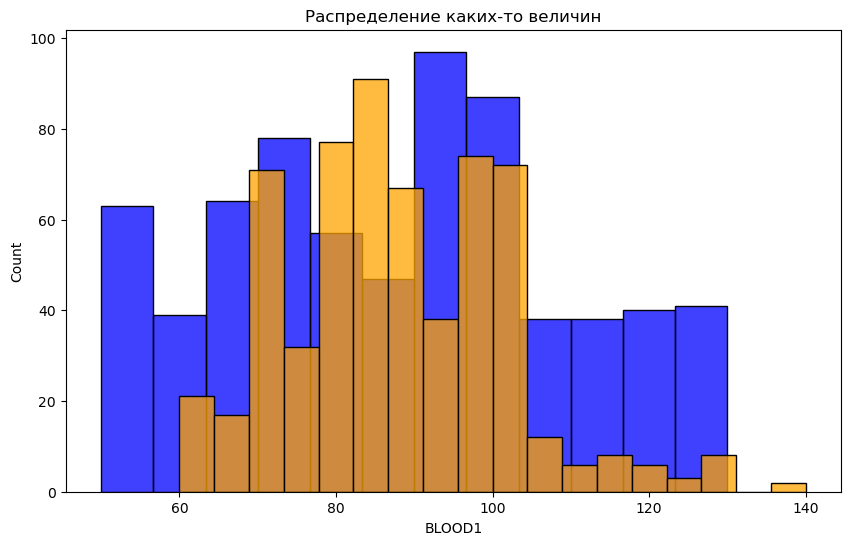

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BLOOD1', color='blue')
sns.histplot(data=df, x='BLOOD2', color='orange')
plt.title('Распределение каких-то величин')


plt.show()

Визуально мы видим что колонка таблицы 'BLOOD1' и 'BLOOD2' похожа на нармальное распределение.

***3. Создайте функцию `mann_whitney_func`,  
которая берет на вход два ряда и уровень значимости (значение альфы по умолчанию - 5%)***

***4. Данная функция делает следующие действия:***

    - в return - значение статистики Манна-Уитни и p_value нулевой гипотезы
    - Принт результата в зависимости от соотношения p_value и alpha ("Распределения (не) равны")

In [9]:
def mann_whitney_func(r1: pd.DataFrame, r2: pd.DataFrame, alpha: float=0.05) -> tuple:
    mw_stat, p_value = stats.mannwhitneyu(x=r1.dropna(), y=r2.dropna())
    
    # зависимость от соотношения p_value и alpha ("Распределения (не) равны")
    if p_value > alpha:
        text = 'Распределения равны'
    else:
        text = 'Распределения не равны'
        
    # Принт результата
    print(f'{mw_stat = },\n{p_value = }\n{text}')
    
    # значение статистики Манна-Уитни и p_value нулевой гипотезы
    return mw_stat, p_value

***5. Примените эту функцию к рядам BLOOD1 и BLOOD2 из csv-файла***

In [10]:
mw, pv = mann_whitney_func(df[ 'BLOOD1'], df[ 'BLOOD2'])

mw_stat = 204918.0,
p_value = 0.6013040790511626
Распределения равны


In [11]:
mws, pv = mann_whitney_func(df[ 'BLOOD2'], df[ 'BLOOD1'])

mw_stat = 211927.0,
p_value = 0.6013040790511626
Распределения равны


***6. Примените к этим рядам также t-test для сравнения средних***

In [12]:
stats.ttest_ind(df[ 'BLOOD1'].dropna(), df[ 'BLOOD2'].dropna())

TtestResult(statistic=-0.45925522667604074, pvalue=0.646128152458181, df=1292.0)

In [13]:
stats.ttest_ind(df[ 'BLOOD2'].dropna(), df[ 'BLOOD1'].dropna())

TtestResult(statistic=0.45925522667604074, pvalue=0.646128152458181, df=1292.0)